Задача №1

Polynomial Regression: 
RSS: 0.9389500102764906
R-squared: 0.9993881429754723
F-statistic: 160070.1374429598
F p-value: 2.8261614157817703e-159

Local Constant Regression: 
RSS: 1659.9622267773866
R-squared: -0.0816971487176188
F-statistic: -7.401628620190365
F p-value: 1.0

Local Linear Regression: 
RSS: 0.3040083541796013
R-squared: 0.999801896112696
F-statistic: 494591.93937313475
F p-value: 2.8380379079282158e-183

Spline Regression: 
RSS: 3.005187381447816e-29
R-squared: 1.0
F-statistic: 5.004342665167847e+33
F p-value: 0.0


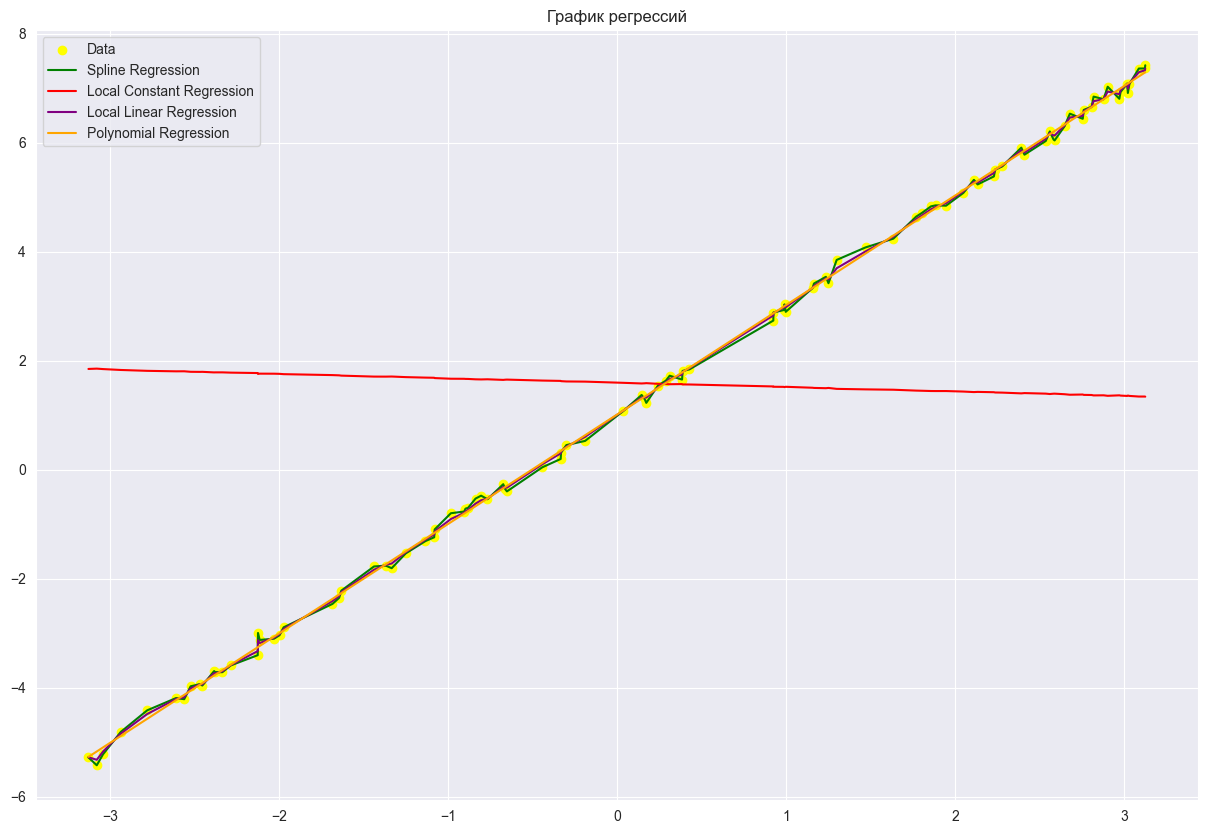

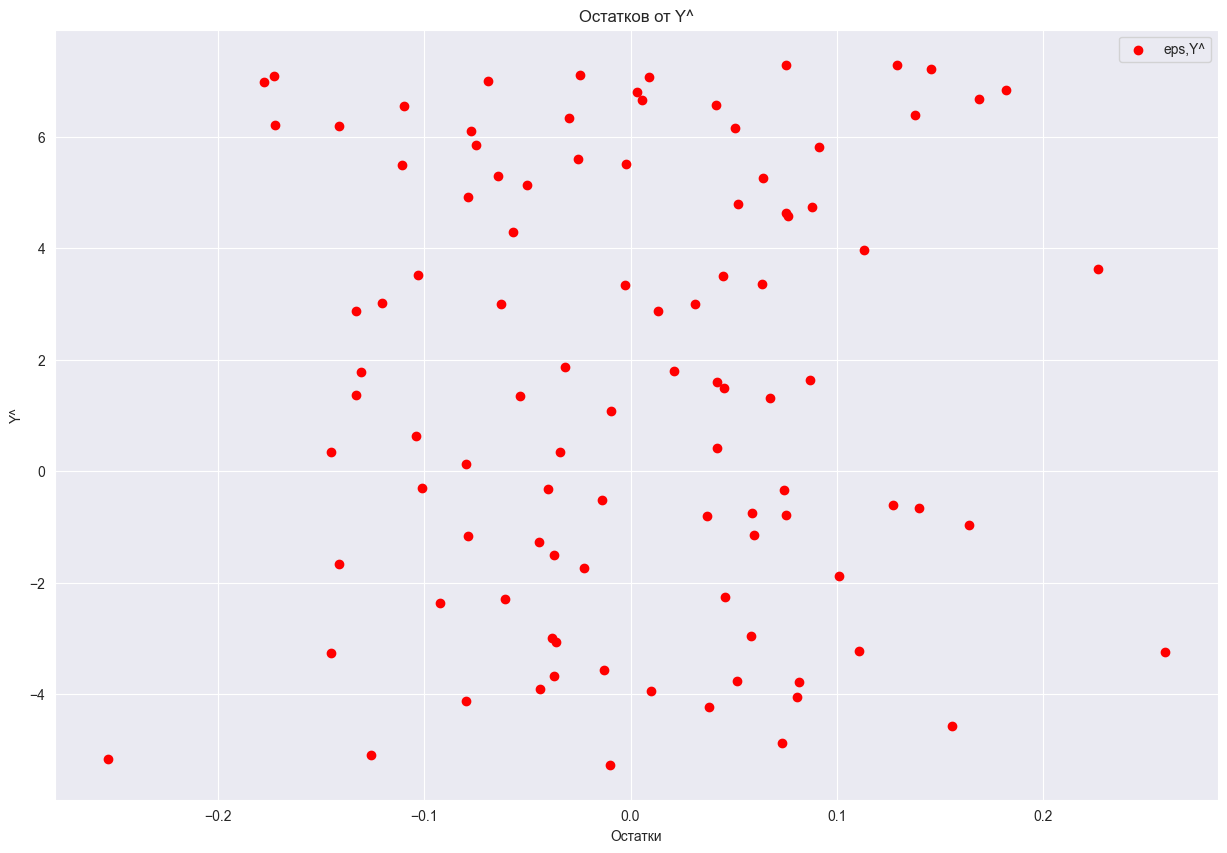

Polynomial Regression: 
RSS: 17.34639109066531
R-squared: 0.9891825895556122
F-statistic: 8961.469500932493
F p-value: 3.798180060387645e-98

Local Constant Regression: 
RSS: 1734.5687195448966
R-squared: -0.08169714871761813
F-statistic: -7.401628620190304
F p-value: 1.0

Local Linear Regression: 
RSS: 3.785225984652078
R-squared: 0.9976394892236242
F-statistic: 41418.43829835274
F p-value: 1.5241069470885344e-130

Spline Regression: 
RSS: 3.997383155372371e-29
R-squared: 1.0
F-statistic: 3.931299425873787e+33
F p-value: 0.0


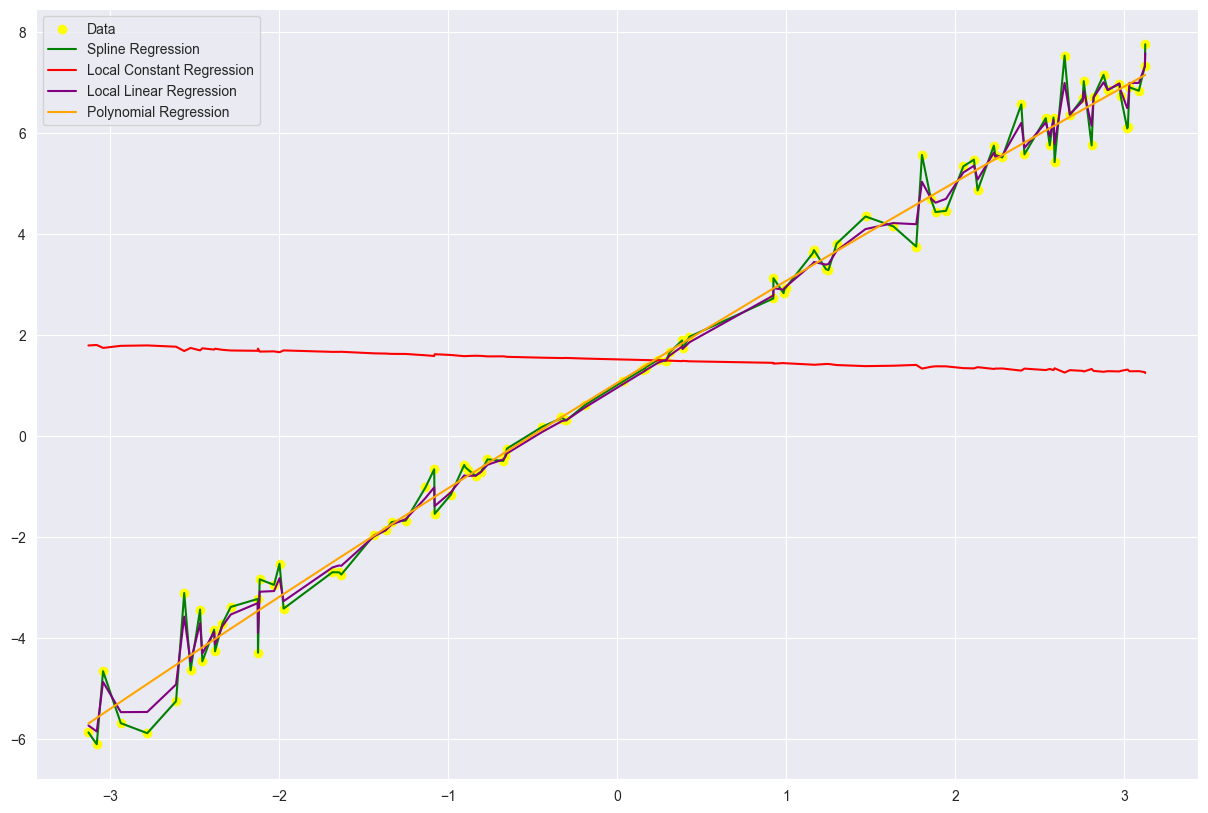

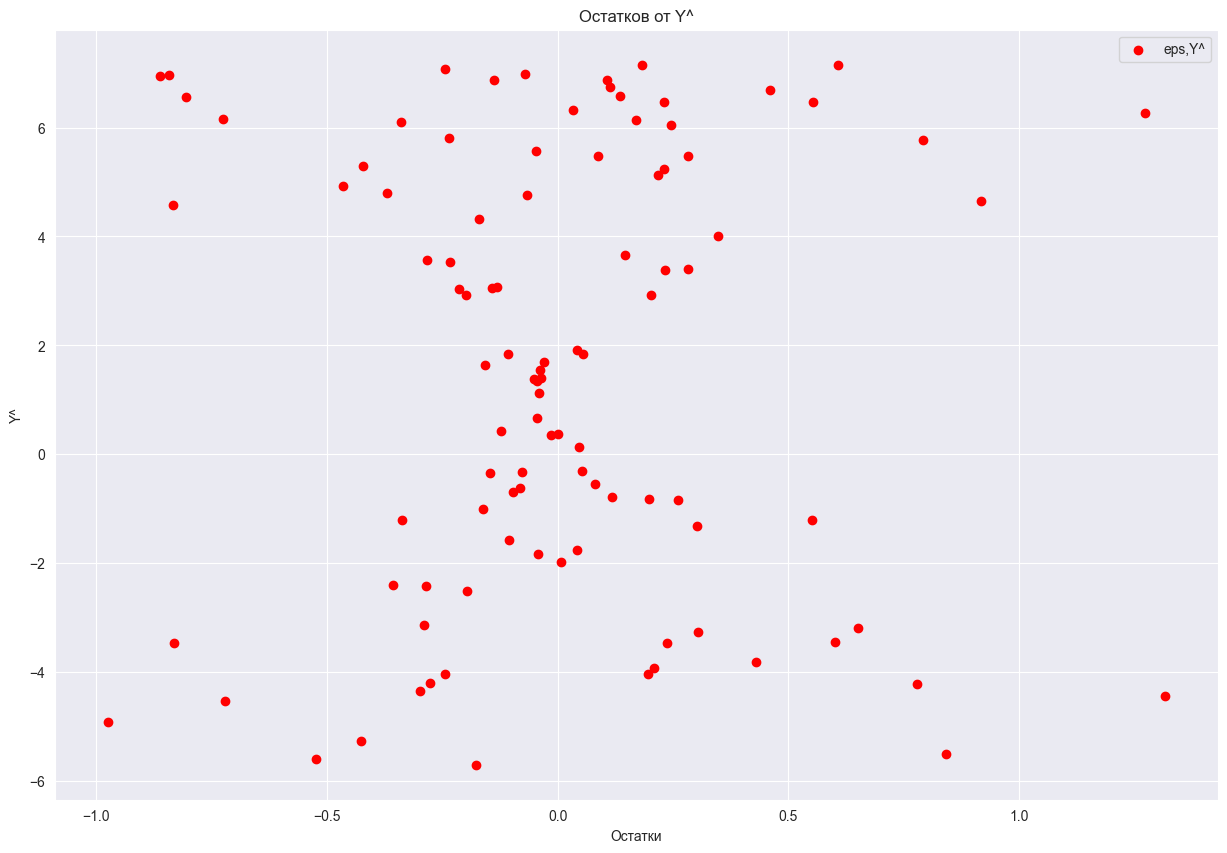

Polynomial Regression: 
RSS: 20.20464656576791
R-squared: 0.5756958023857954
F-statistic: 132.96636929598742
F p-value: 6.000210767372842e-20

Local Constant Regression: 
RSS: 51.50858441638646
R-squared: -0.08169714871761902
F-statistic: -7.401628620190384
F p-value: 1.0

Local Linear Regression: 
RSS: 7.928264412620436
R-squared: 0.8335038497644558
F-statistic: 490.6021980770014
F p-value: 6.204511881974006e-40

Spline Regression: 
RSS: 2.6356569460690835e-30
R-squared: 1.0
F-statistic: 1.7705619341561072e+33
F p-value: 0.0


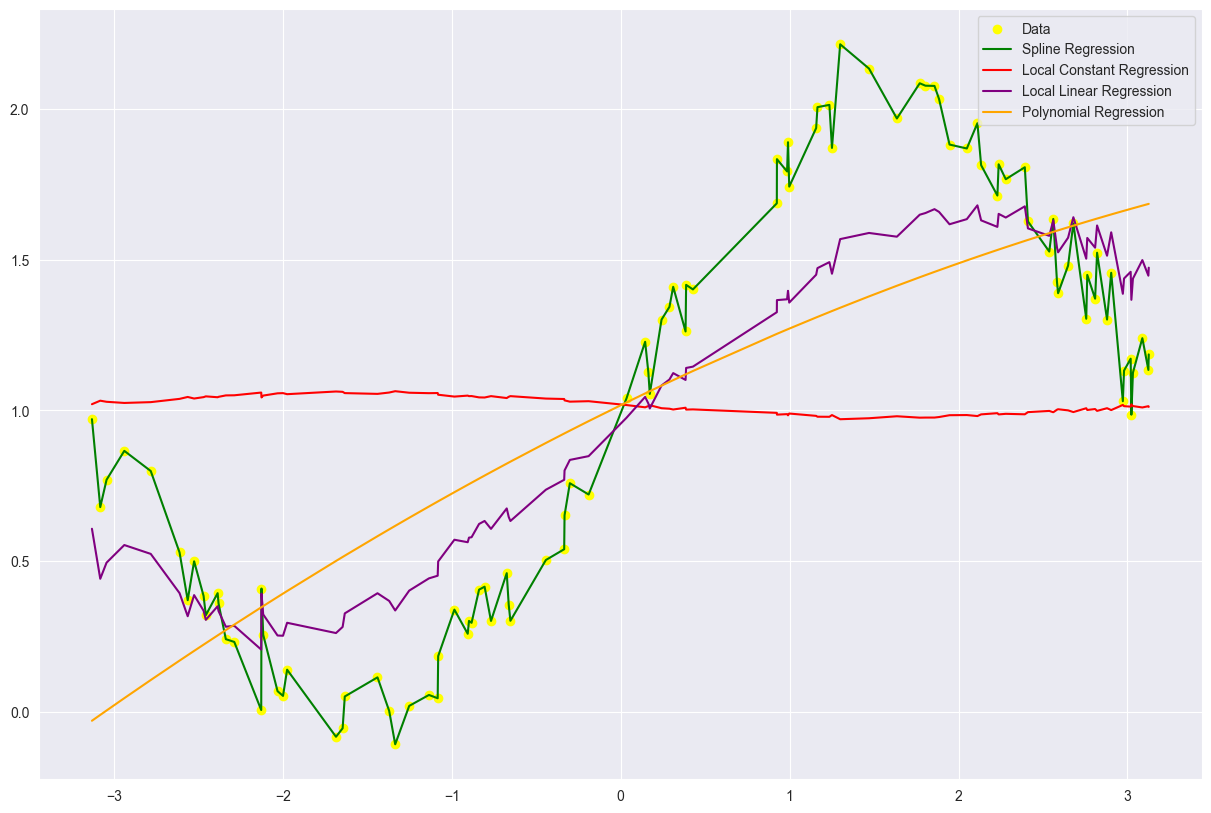

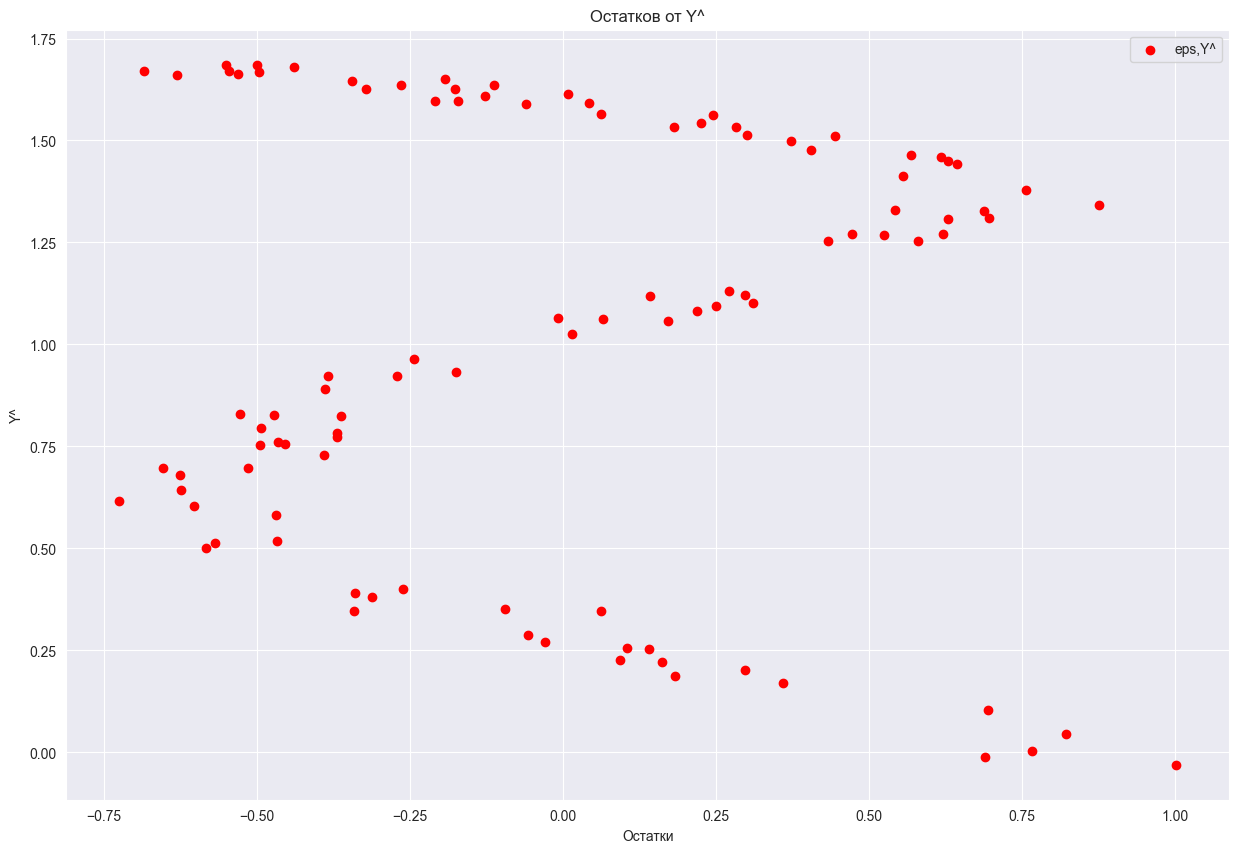

Polynomial Regression: 
RSS: 35.70365728317134
R-squared: 0.5080402695039665
F-statistic: 101.20329637791389
F p-value: 8.968254613119608e-17

Local Constant Regression: 
RSS: 78.50346662125602
R-squared: -0.08169714871761857
F-statistic: -7.401628620190353
F p-value: 1.0

Local Linear Regression: 
RSS: 11.60133993106681
R-squared: 0.8401454500693228
F-statistic: 515.0573076743755
F p-value: 8.409002518076219e-41

Spline Regression: 
RSS: 7.422789793239146e-30
R-squared: 1.0
F-statistic: 9.581688855089341e+32
F p-value: 0.0


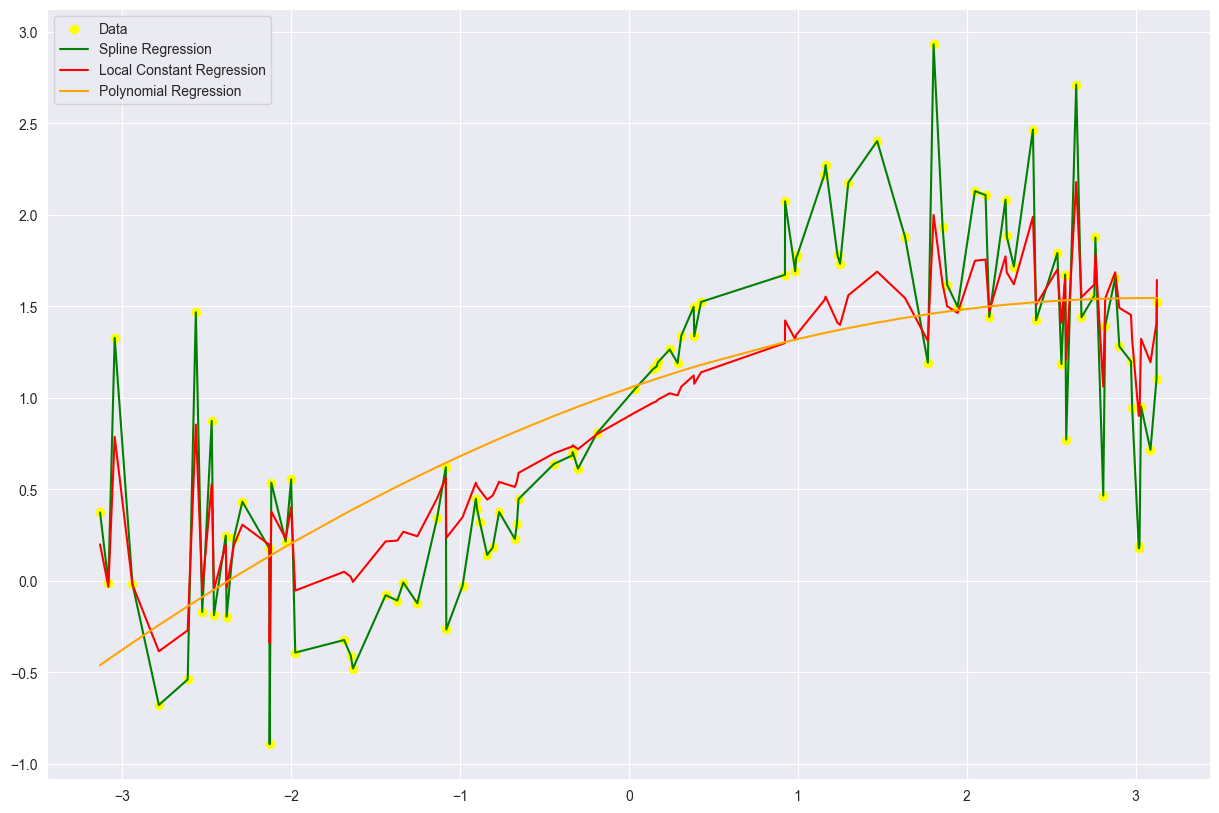

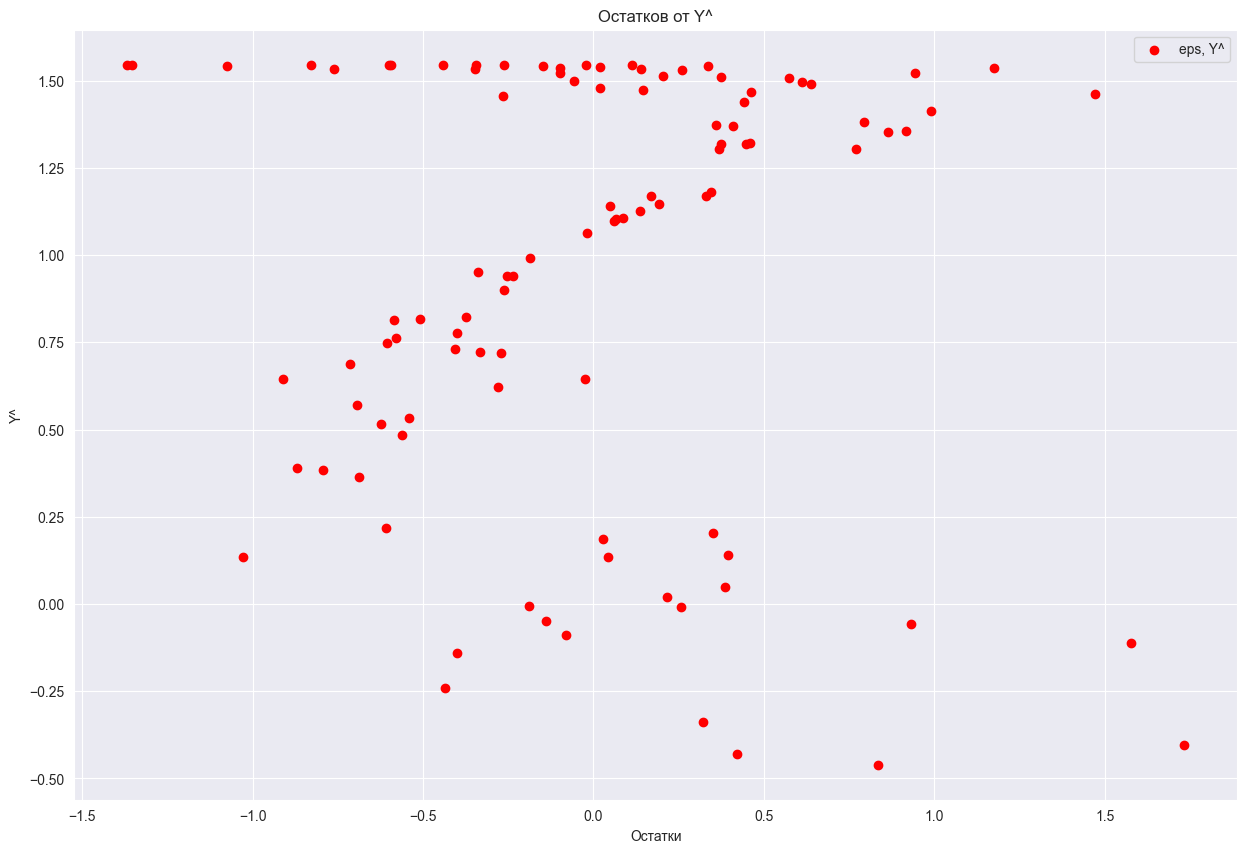

In [74]:
from scipy.interpolate import splrep, splev
import statsmodels
import pc
from statsmodels.nonparametric.kernel_regression import KernelReg
import statsmodels.api as sm
import statsmodels.stats.api as ssa
from sklearn.linear_model import LinearRegression
import scipy
import numpy as np
import random
import sklearn
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
import math
from scipy.stats import bws_test
from sklearn import linear_model 
import csv
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import f
from statsmodels.stats.outliers_influence import summary_table


def f1(x, y, y_pred):
    rss = np.sum((y - y_pred)**2)
    
    tss = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (rss / tss)
    
    n = len(x)
    df_num = 1
    df_denom = n - df_num - 1
    
    f_statistic = ((tss - rss) / df_num) / (rss / df_denom)
    f_p_value = f.sf(f_statistic, df_num, df_denom)
    
    print("RSS:", rss)
    print("R-squared:", r_squared)
    print("F-statistic:", f_statistic)
    print("F p-value:", f_p_value)

n = 100

#Var a
X0 = np.ones(n)
X = np.random.uniform(-math.pi,math.pi, n)
X.sort()
eps_1 = np.random.normal(0,0.1, n)
eps_2 = np.random.normal(0, abs(X/5), n)
Y_11 = 2*X + 1 + eps_1
Y_12 = 2*X + 1 + eps_2
Y_21 = np.sin(X) + eps_1 +1
Y_22 = np.sin(X) + eps_2 +1
df = pd.DataFrame({'X': X, 
                   'Y_11': Y_11, 
                   'Y_12': Y_12, 
                   'Y_21': Y_21, 
                   'Y_22': Y_22})

# model = statsmodels.nonparametric.kernel_regression.KernelReg(X, Y_11, 'u', reg_type = "lc").fit() 
# print(model)

# Локально постоянная и линейная регрессия
def local_constant_regression(X, Y, kernel):
    model = KernelReg(Y, X, var_type='u', reg_type='lc', bw='cv_ml', ukertype=kernel)
    return model

def local_linear_regression(X, Y, kernel):
    model = KernelReg(Y, X, var_type='u', reg_type='ll', bw='cv_ml', ukertype=kernel)
    return model

# Регрессия сплайнами
def spline_regression(X, Y):
    
    xs = sorted(zip(X, Y), key=lambda tup: tup[0])
    x_sorted = [x[0] for x in xs]
    y_sorted = [x[1] for x in xs]    
    tck = splrep(x_sorted, y_sorted, s=0)
    y_smooth = splev(x_sorted, tck, der=0)
    return x_sorted, y_smooth


# Построение регрессий и сравнение моделей

# Регрессия по ядрам
kernels = ['aitchison_aitken_reg', 'aitchisonaitken']
for kernel in kernels:
    results_lc_11 = local_constant_regression(X, Y_11, kernel)
    results_ll_11 = local_linear_regression(X, Y_11, kernel)
    results_lc_12 = local_constant_regression(X, Y_12, kernel)
    results_ll_12 = local_linear_regression(X, Y_12, kernel)
    results_lc_21 = local_constant_regression(X, Y_21, kernel)
    results_ll_21 = local_linear_regression(X, Y_21, kernel)
    results_lc_22 = local_constant_regression(X, Y_22, kernel)
    results_ll_22 = local_linear_regression(X, Y_22, kernel)
    



# Регрессия сплайнами
x_spline11, y_spline_11 = spline_regression(X, Y_11)
x_spline12, y_spline_12 = spline_regression(X, Y_12)
x_spline21, y_spline_21 = spline_regression(X, Y_21)
x_spline22, y_spline_22 = spline_regression(X, Y_22)

# Полиномиальная регрессия
X_poly = sm.add_constant(np.column_stack((X0, X, X**2)))
# X_poly2 = sm.add_constant(np.column_stack((X0, X)))
model_poly_11 = sm.OLS(Y_11, X_poly).fit()
model_poly_12 = sm.OLS(Y_12, X_poly).fit()
model_poly_21 = sm.OLS(Y_21, X_poly).fit()
model_poly_22 = sm.OLS(Y_22, X_poly).fit()




# Сравнение моделей по метрикам качества

b = model_poly_11.params
Y_plt = b[0] + b[1] * X + b[2]* X**2
print("Polynomial Regression: ")
f1(X, Y_11, Y_plt)

print("\nLocal Constant Regression: ")
f1(X, Y_11, results_lc_11.fit(df['X'])[0])

print("\nLocal Linear Regression: ")
f1(X, Y_11, results_ll_11.fit(df['X'])[0])

print("\nSpline Regression: ")
f1(x_spline11, Y_11, y_spline_11)


plt.figure(figsize=(15, 10))
plt.scatter(X, Y_11, color='yellow', label='Data')
plt.plot(x_spline11, y_spline_11, color='green', label='Spline Regression')
plt.plot(df['X'], results_lc_11.fit(df['X'])[0], color='red', label='Local Constant Regression')
plt.plot(df['X'], results_ll_11.fit(df['X'])[0], color='purple', label='Local Linear Regression')
plt.plot(df['X'], Y_plt, color='orange', label='Polynomial Regression')
plt.title('График регрессий')
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(model_poly_11.resid, Y_plt, color='r', label='eps,Y^')
plt.title('Остатков от Y^')
plt.ylabel('Y^')
plt.xlabel('Остатки')
plt.legend()
plt.show()

b = model_poly_12.params
Y_plt = b[0] + b[1] * X + b[2]* X**2

print("Polynomial Regression: ")
f1(X, Y_12, Y_plt)

print("\nLocal Constant Regression: ")
f1(X, Y_12, results_lc_12.fit(df['X'])[0])

print("\nLocal Linear Regression: ")
f1(X, Y_12, results_ll_12.fit(df['X'])[0])

print("\nSpline Regression: ")
f1(x_spline12, Y_12, y_spline_12)

plt.figure(figsize=(15, 10))
plt.scatter(X, Y_12, color='yellow', label='Data')
plt.plot(x_spline12, y_spline_12, color='green', label='Spline Regression')
plt.plot(df['X'], results_lc_12.fit(df['X'])[0], color='red', label='Local Constant Regression')
plt.plot(df['X'], results_ll_12.fit(df['X'])[0], color='purple', label='Local Linear Regression')
plt.plot(df['X'], Y_plt, color='orange', label='Polynomial Regression')
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(model_poly_12.resid, Y_plt, color='r', label='eps,Y^')
plt.title('Остатков от Y^')
plt.ylabel('Y^')
plt.xlabel('Остатки')
plt.legend()
plt.show()


b = model_poly_21.params
Y_plt = b[0] + b[1] * X + b[2]* X**2
print("Polynomial Regression: ")
f1(X, Y_21, Y_plt)

print("\nLocal Constant Regression: ")
f1(X, Y_21, results_lc_21.fit(df['X'])[0])

print("\nLocal Linear Regression: ")
f1(X, Y_21, results_ll_21.fit(df['X'])[0])

print("\nSpline Regression: ")
f1(x_spline21, Y_21, y_spline_21)

plt.figure(figsize=(15, 10))
plt.scatter(X, Y_21, color='yellow', label='Data')
plt.plot(x_spline21, y_spline_21, color='green', label='Spline Regression')
plt.plot(df['X'], results_lc_21.fit(df['X'])[0], color='red', label='Local Constant Regression')
plt.plot(df['X'], results_ll_21.fit(df['X'])[0], color='purple', label='Local Linear Regression')
plt.plot(df['X'], Y_plt, color='orange', label='Polynomial Regression')
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(model_poly_21.resid,Y_plt, color='r', label='eps,Y^')
plt.title('Остатков от Y^')
plt.ylabel('Y^')
plt.xlabel('Остатки')
plt.legend()
plt.show()





b = model_poly_22.params
Y_plt = b[0] + b[1] * X + b[2]* X**2

print("Polynomial Regression: ")
f1(X, Y_22, Y_plt)

print("\nLocal Constant Regression: ")
f1(X, Y_22, results_lc_22.fit(df['X'])[0])

print("\nLocal Linear Regression: ")
f1(X, Y_22, results_ll_22.fit(df['X'])[0])

print("\nSpline Regression: ")
f1(x_spline22, Y_22, y_spline_22)



plt.figure(figsize=(15, 10))
plt.scatter(X, Y_22, color='yellow', label='Data')
plt.plot(x_spline22, y_spline_22, color='green', label='Spline Regression')
plt.plot(df['X'], results_lc_22.fit(df['X'])[0], color='red', label='Local Constant Regression')
plt.plot(df['X'], results_ll_22.fit(df['X'])[0], color='purple', label='Local Linear Regression')
plt.plot(df['X'], Y_plt, color='orange', label='Polynomial Regression')
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(model_poly_22.resid, Y_plt,  color='r', label='eps, Y^')
plt.title('Остатков от Y^')
plt.ylabel('Y^')
plt.xlabel('Остатки')
plt.legend()
plt.show()

Задача №2

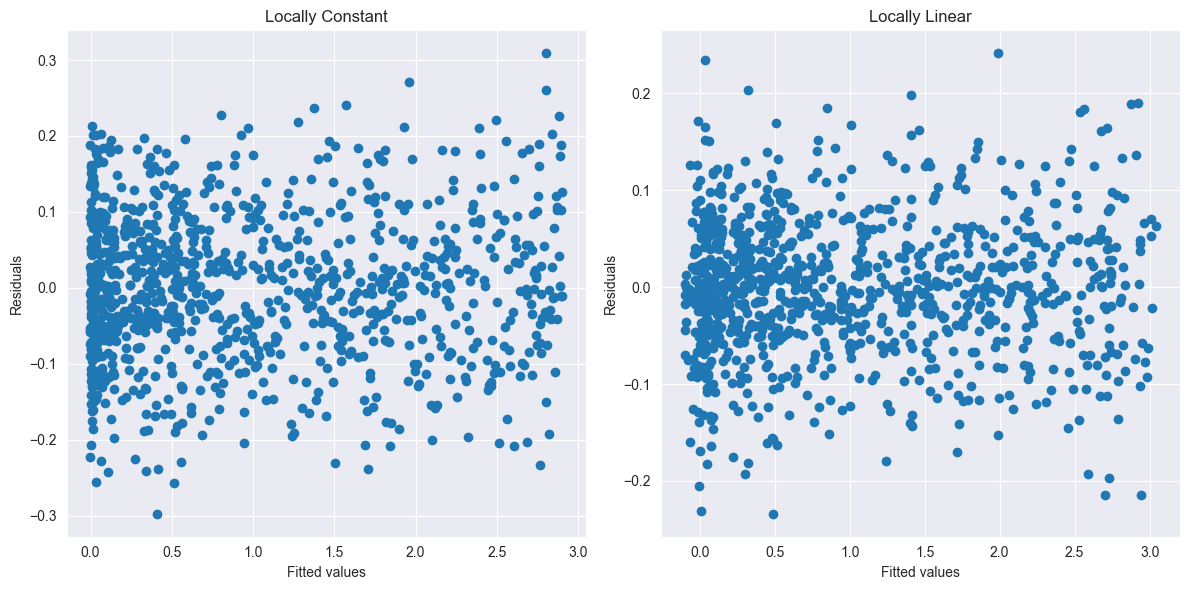

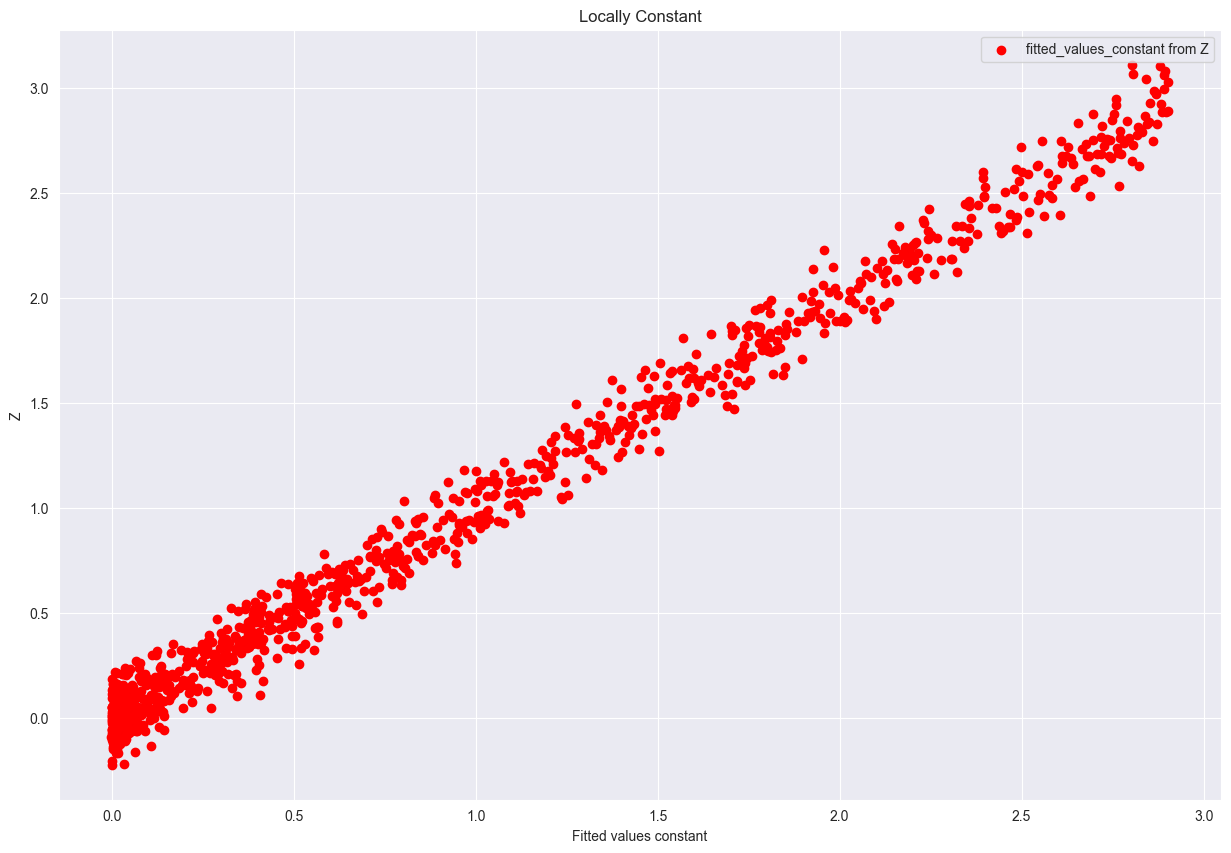

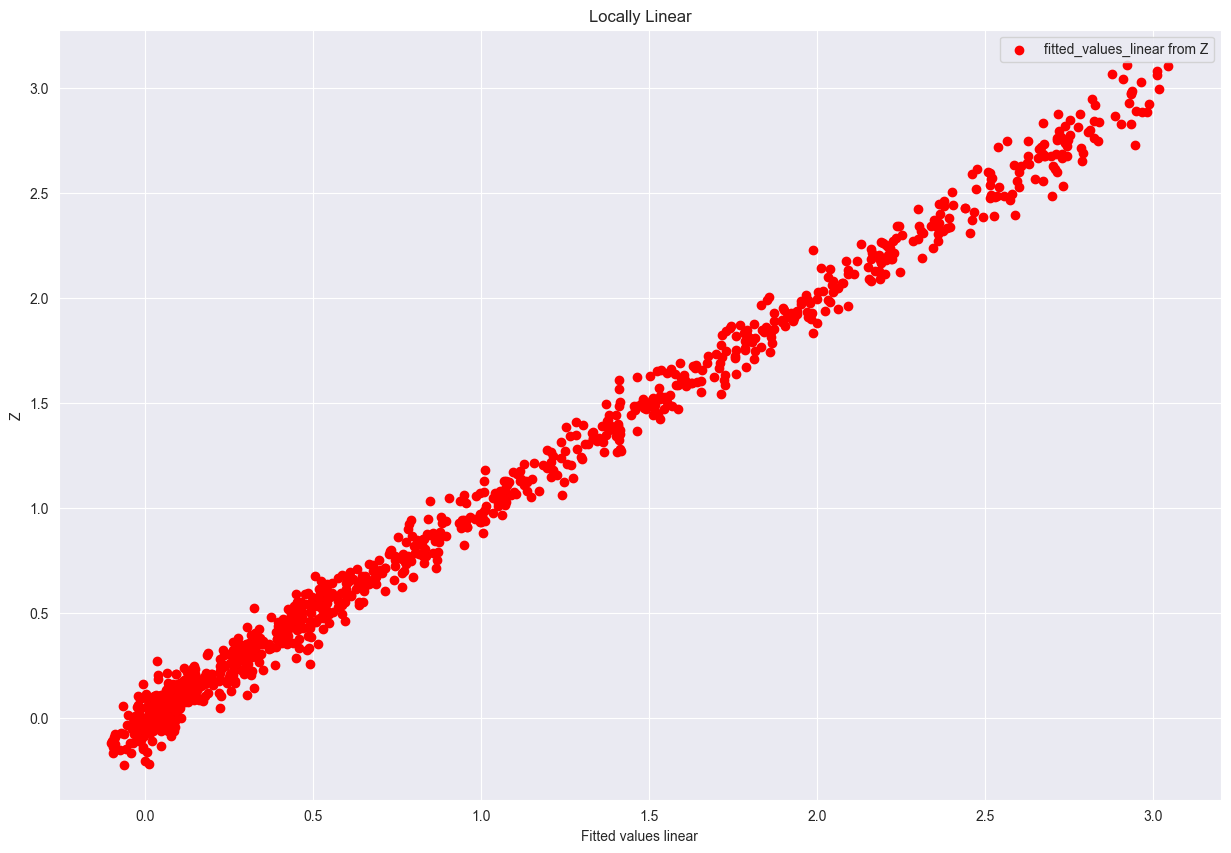

Local Constant Regression:
X, Z:
RSS: 9.563151105209318
R-squared: 0.9882123776560995
F-statistic: 83667.08095387126
F p-value: 0.0
Y, Z:
RSS: 9.563151105209318
R-squared: 0.9882123776560995
F-statistic: 83667.08095387126
F p-value: 0.0

Local Linear Regression:
X, Z:
RSS: 4.941368812624944
R-squared: 0.993909226280716
F-statistic: 162856.38796391757
F p-value: 0.0
Y, Z:
RSS: 4.941368812624944
R-squared: 0.993909226280716
F-statistic: 162856.38796391757
F p-value: 0.0


In [75]:

n = 1000

X0 = np.ones(n)
X = np.random.uniform(0,1, n)
X.sort()
Y = np.random.uniform(0,1, n)
Y.sort()
eps = np.random.normal(0, 0.1, n)
Z = X**2 + Y**2 + X*Y + eps

# Локально постоянная оценка

data = pd.DataFrame({"X": X, "Y": Y, "Z": Z})
kr_constant = KernelReg(endog=data["Z"], exog=data[["X", "Y"]], var_type='cc', reg_type='lc', bw='cv_ml', ckertype="gaussian")

# Локально линейная оценка
kr_linear = KernelReg(endog=data["Z"], exog=data[["X", "Y"]], var_type='cc', reg_type='ll', bw='cv_ml', ckertype="gaussian")


fitted_values_constant, _ = kr_constant.fit(data[["X", "Y"]])
residuals_constant = data["Z"] - fitted_values_constant

fitted_values_linear, _ = kr_linear.fit(data[["X", "Y"]])
residuals_linear = data["Z"] - fitted_values_linear

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(fitted_values_constant, residuals_constant)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Locally Constant")

plt.subplot(1, 2, 2)
plt.scatter(fitted_values_linear, residuals_linear)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Locally Linear")

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(fitted_values_constant, Z, color="red", label="fitted_values_constant from Z")
plt.xlabel("Fitted values constant")
plt.ylabel("Z")
plt.title("Locally Constant")
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(fitted_values_linear, Z, color="red", label="fitted_values_linear from Z")
plt.xlabel("Fitted values linear")
plt.ylabel("Z")
plt.title("Locally Linear")
plt.legend()
plt.show()

# RSS и 𝑅^2
# rss_constant = rss(data["Z"], fitted_values_constant)
# rss_linear = rss(data["Z"], fitted_values_linear)
print("Local Constant Regression:")
print("X, Z:")
f1(X, Z, fitted_values_constant)
print("Y, Z:")
f1(Y, Z, fitted_values_constant)

print("\nLocal Linear Regression:")
print("X, Z:")
f1(X, Z, fitted_values_linear)
print("Y, Z:")
f1(Y, Z, fitted_values_linear)

